In [3]:
# -*- coding: utf-8 -*-

#np.sum(data.values >= np.finfo(np.float64).max)
#np.sum(data.values >= np.finfo(np.float32).max)#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  1 09:20:02 2018

@author: leaferickson
"""
#np.isnan(data.values.any())
#data.dropna(how = "any")


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
data = pd.read_csv("../data.csv")

#data["value"] = data.groupby("name").transform(lambda x: x.fillna(x.mean()))
#X = data.loc[:,"Attr1":"Attr64"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify = y)
data_train, data_test = train_test_split(data, test_size=0.3, random_state=45, stratify = data["class"])

data_test.groupby("class").mean()
X_train = data_train.transform(lambda x: x.fillna(x.mean())).loc[:,"Attr1":"Attr64"]
y_train = data_train["class"]
X_test = data_test.transform(lambda x: x.fillna(x.mean())).loc[:,"Attr1":"Attr64"]
y_test = data_test["class"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8, 12, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Impurity threshold change under which to no longer split
min_impurity_decrease = [0, 0.02, 0.05, 0.1]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_impurity_decrease': min_impurity_decrease}

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(), scoring = 'roc_auc', param_distributions = random_grid, n_iter = 72, cv = 3, verbose=2, random_state=31, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=auto, max_depth=30 
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=auto, max_depth=30 
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=auto, max_depth=30 
[CV] min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=40 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=40, total=   0.6s
[CV] min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=40 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=40, total=   0.6s
[CV] min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=40 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impu

[CV]  min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.05, max_features=sqrt, max_depth=None, total=   0.7s
[CV] min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=70 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.7s


[CV]  min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.05, max_features=sqrt, max_depth=None, total=   0.7s
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=70, total=   0.8s
[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=70, total=   0.8s
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV] min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=70, total=   0.9s
[CV] min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0, max_features=sqrt, max_depth=60 
[CV]  min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0, max_featur

[CV]  min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0, max_features=sqrt, max_depth=20, total=   2.9s
[CV] min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=40, total=   3.7s
[CV] min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=40, total=   3.7s
[CV] min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.02, max_features=auto, max_depth=20 
[CV]  min_samples_split=5, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=40, total=   3.5s
[CV] min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=auto, max_depth=90 
[CV]  min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.02, max_features

[CV]  min_samples_split=10, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] min_samples_split=10, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=sqrt, max_depth=60 
[CV]  min_samples_split=10, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=20, total=   0.6s
[CV] min_samples_split=10, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=sqrt, max_depth=60 
[CV]  min_samples_split=10, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=20, total=   0.6s
[CV] min_samples_split=10, min_samples_leaf=4, min_impurity_decrease=0.1, max_features=sqrt, max_depth=60 
[CV]  min_samples_split=10, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=auto, max_depth=90, total=   2.5s
[CV] min_samples_split=10, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=sqrt, max_depth=70 
[CV]  min_samples_split=10, min_samples_leaf=4, min_impurity_decrease=0.1, max_feat

[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] min_samples_split=5, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=auto, max_depth=70 
[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] min_samples_split=5, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=auto, max_depth=70 
[CV]  min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=auto, max_depth=70, total=   3.0s
[CV] min_samples_split=5, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=auto, max_depth=70 
[CV]  min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.05, max_features=auto, max_depth=70, total=   2.8s
[CV] min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.02, max_f

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min


[CV]  min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=90, total=   3.5s
[CV] min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=auto, max_depth=90, total=   4.0s
[CV] min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=None, total=   0.5s
[CV] min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=sqrt, max_depth=None, total=   0.5s
[CV] min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_features=auto, max_depth=60 
[CV]  min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.1, max_fe

[CV]  min_samples_split=2, min_samples_leaf=4, min_impurity_decrease=0.02, max_features=sqrt, max_depth=60, total=   0.7s
[CV] min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30 
[CV]  min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30, total=   0.7s
[CV] min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30 
[CV]  min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30, total=   0.7s
[CV] min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30 
[CV]  min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.02, max_features=sqrt, max_depth=30, total=   0.7s
[CV] min_samples_split=10, min_samples_leaf=2, min_impurity_decrease=0.05, max_features=auto, max_depth=20 
[CV]  min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0, max_feature

[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=72, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'min_impurity_decrease': [0, 0.02, 0.05, 0.1]},
          pre_dispatch='2*n_jobs', random_state=31, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [4]:
rf_random.best_score_

0.9185598013877515

In [5]:
rf_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0,
 'max_features': 'auto',
 'max_depth': 10}

In [6]:
rf_random.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

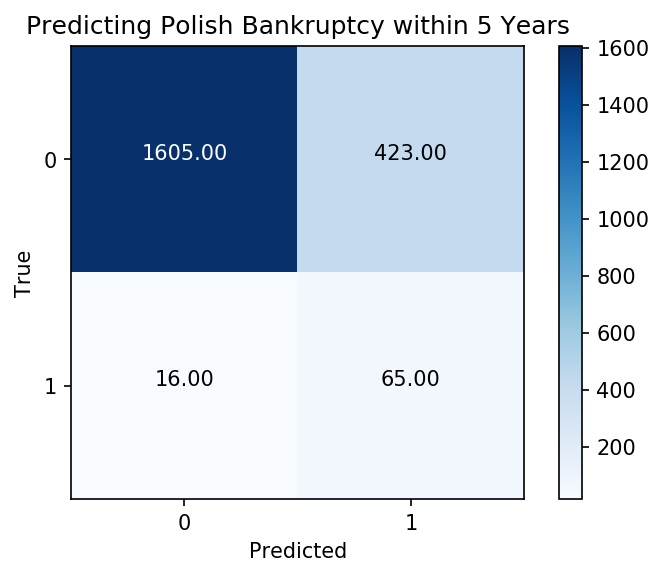

In [7]:
rf = GradientBoostingClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 1, min_impurity_decrease = 0, max_depth = 10, random_state = 31)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
rf.score(X_test, y_test)
roc_auc_score(y_test, rf.predict(X_test))



from sklearn.metrics import confusion_matrix
import itertools

plt.figure(dpi=150)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.title("Predicting Polish Bankruptcy within 5 Years")
plt.ylabel("True")
plt.xlabel("Predicted")
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
#    plt.savefig("RF_Naive")# -*- coding: utf-8 -*-